<center>
<font size='7' style="color:#0D47A1">  <b>CLEANING DATA</b> </font>
</center>

<hr style= "height:3px;">
<br>

Resources: 
This notebook follows https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf

For Easy.py see http://www.developerstation.org/2011/03/simple-tutorial-on-using-libsvm.html

### Transform the data to the format of an SVM package
We will use sklearn.svm to analyze a synthetic dataset make cicles: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles

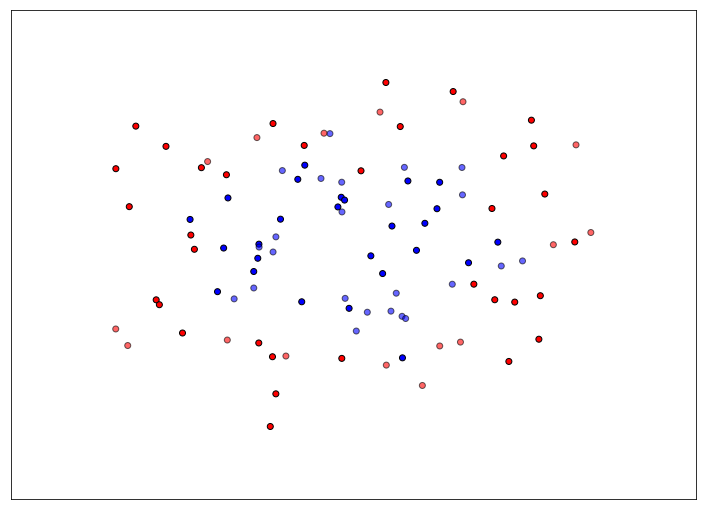

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
%matplotlib inline 
h = .02  # step size in the mesh
figure = plt.figure(figsize=(27, 9))
i = 1

# preprocess dataset, split into training and test part

X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 2, i)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1


plt.show()

### Are there outliers?
We can  use IsolationForest to find outliers.
### Is the data weighted? 
We have two classes and we need to make sure the proportion among them is close to 1 (or that the number of representatives of one divided by the total amount is closed to .5)


### Conduct simple scaling on the data
Many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order.
In "preprocessing" there is a function called StandardScaller that finds the coefficients to make our features centered and with standar deviation 1. We use it to convert our train data and our  test data with the same parameters.

### Consider the RBF kernel $K(x,y)=e^{\gamma||s-y||^2}$
When the number of features is very large, one may just use the linear kernel.
We split the train test to have a way to evaluate performance.


### Use cross-validation to find the best parameter $C$, $\gamma$
Here we tell to the Grid search to use "accuracy" as the score to compare. You will need to modify this to test for the 4 different scores available in the first task.

After we get the best parameters, we repeat the search with parameters closer to the previously found.

### Use the best parameter $C$ and $\gamma$ to train the whole training set
After the best (C, γ) is found, the whole training set is trained again
to generate the final classifier.
The above approach works well for problems with thousands or more data points.
For very large data sets a feasible approach is to randomly choose a subset of the
data set, conduct grid-search on them, and then do a better-region-only grid-search
on the complete data set.

In [2]:
import math
e= math.e
print('percentage of points of class 1 {0}'.format(np.sum(y[y == 1])/len(y)))

percentage of points of class 1 0.5


### Outliers?
Always plot your data! we dont remove outliers because they all belong to class red. We will scale the data. 

In [3]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)
#######The code below removes outiers.
#from sklearn.ensemble import IsolationForest
# fit the model
#clf = IsolationForest(max_samples=250)
#clf = clf.fit(X)
#y_pred = clf.predict(X)

#X = X[y_pred==1]
#y = y[y_pred==1]
#print("Outliers removed")

#print('percentage of points of class 1 {0}'.format(np.sum(y[y == 1])/len(y)))

In [8]:
#Broad grid search

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

training_X, testing_X, training_Y = X_train, X_test, y_train
# testing_Y) = train_test_split(dataX, dataY, train_size = .90, random_state = 1)

accuracy_scorer = make_scorer(accuracy_score, greater_is_better=True)#This step is needed to personalize the score used by Grid search
inner_cv = KFold(n_splits=4, shuffle=True)
param_grid =[ {'C':[.00001, .001, 1, 1e2, 1e3, 1e4, 1e5], 'kernel':['linear']},
{'C':[.00001, .01, 1, 1e2, 1e3, 1e4, 1e5],
             'gamma':[.0001, .001, .01, .1, 1, 10, 100],'kernel':['rbf'] },
]

clf = GridSearchCV( SVC( class_weight = 'balanced'), param_grid, scoring = accuracy_scorer, cv = inner_cv)# lets you determine other scoring
clf = clf.fit(X_train, y_train)
print("Classifier parameters found")
print(clf.best_params_)

Classifier parameters found
{'C': 100.0, 'gamma': 10, 'kernel': 'rbf'}


Now we make another search close to the previous parameters.
Classifier parameters found
{'C': 100.0, 'gamma': 10, 'kernel': 'rbf'}
Grid scores on development set:
0.766667 (+/-0.200) for {'C': 100.0, 'gamma': 10, 'kernel': 'rbf'}
0.766667 (+/-0.200) for {'C': 100.0, 'gamma': 10.000911881965555, 'kernel': 'rbf'}
0.766667 (+/-0.200) for {'C': 100.0, 'gamma': 10.000045399929762, 'kernel': 'rbf'}
0.766667 (+/-0.200) for {'C': 100.0, 'gamma': 9.999088118034445, 'kernel': 'rbf'}
0.766667 (+/-0.200) for {'C': 100.0, 'gamma': 9.999954600070238, 'kernel': 'rbf'}
0.766667 (+/-0.200) for {'C': 100.00012340980409, 'gamma': 10, 'kernel': 'rbf'}
0.766667 (+/-0.200) for {'C': 100.00012340980409, 'gamma': 10.000911881965555, 'kernel': 'rbf'}
0.766667 (+/-0.200) for {'C': 100.00012340980409, 'gamma': 10.000045399929762, 'kernel': 'rbf'}
0.766667 (+/-0.200) for {'C': 100.00012340980409, 'gamma': 9.999088118034445, 'kernel': 'rbf'}
0.766667 (+/-0.200) for {'C': 100.00012340980409, 'gamma': 9.99995460007

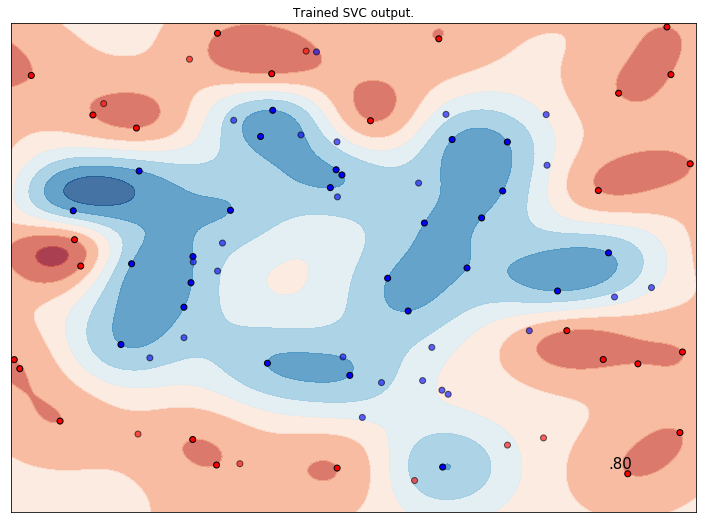

In [9]:

print("Now we make another search close to the previous parameters.")

c_v = clf.best_params_['C']
g_v = clf.best_params_['gamma']
param_grid =[ {
'C':
[c_v, c_v+e**(-9), c_v+e**(-5), c_v-e**(-5), c_v-e**(-9)],
             'gamma':
[g_v, g_v+e**(-7), g_v+e**(-10), g_v-e**(-7), g_v-e**(-10)],
            'kernel':
            ['rbf'] 
                  },]

clf = GridSearchCV( SVC( class_weight = 'balanced'), param_grid, scoring = accuracy_scorer, cv = inner_cv)# lets you determine other scoring
clf = clf.fit(X_train, y_train)
print("Classifier parameters found")
print(clf.best_params_)



print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f (+/-%0.03f) for %r"% (mean, std * 2, params))


clf = SVC(C= clf.best_params_['C'], gamma= clf.best_params_['gamma'], kernel = clf.best_params_['kernel'],  class_weight = 'balanced')
print("+++++++++++++++++++++++++++++++")
print("Evaluation on new data.")
clf.fit(X_train, y_train)


figure = plt.figure(figsize=(27, 9))
ax = plt.subplot(1, 2, i)

score = clf.score(X_test, y_test)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='k', alpha=0.6)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Trained SVC output.')
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
        size=15, horizontalalignment='right')
i += 1

plt.show()



#### There is already a package that does all of this for you: easy.py.